In [119]:
#pattern recognition of words to identify duplicate questions 
#author Pradeep Purushothaman

#imports

import os
import re

import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [120]:
#read the question list csv file
#dataset
#https://www.kaggle.com/datasets/tunguz/200000-jeopardy-questions
#limiting only to 10,000 questions to avoid a single computer processing overload

questions=pd.read_csv("C:/JEOPARDY_CSV.csv",header='infer')

#list of columns of the data frame
questions.columns.tolist()

#first one lakh questions
questions[' Question'].head(10000)

0        For the last 8 years of his life, Galileo was ...
1        No. 2: 1912 Olympian; football star at Carlisl...
2        The city of Yuma in this state has a record av...
3        In 1963, live on "The Art Linkletter Show", th...
4        Signer of the Dec. of Indep., framer of the Co...
                               ...                        
99995             He was postmaster of New Salem, Illinois
99996    "Some get a kick from" this, a Cole Porter son...
99997    It's the shrewd awareness & resourcefulness ne...
99998           Very sage, or a pair of the letter after X
99999    Bulgaria is a leading producer of attar, an oi...
Name:  Question, Length: 100000, dtype: object

In [121]:
#checking for exact duplicates of questions

duplicated_questions=questions[questions[' Question'].duplicated()]
duplicated_questions.head(1000)




,Show Number,Air Date,Round,Category,Value,Question,Answer
7141,5171,2007-02-19,Double Jeopardy!,NAME THE POET,$400,"""His pride had cast him out from heaven, with ...",Milton
7699,5467,2008-05-20,Double Jeopardy!,"""T"" TIME",$1600,"Poi, a luau treat, is made from these mashed r...",taro
13382,3788,2001-02-07,Jeopardy!,MAMMALS,$300,"Common in Dixie, a razorback is a wild one of ...",boar (hog)
13737,1191,1989-11-06,Jeopardy!,THE QUOTABLE FRANKLIN,$200,"These ""fell great oaks""",Little Srokes
15558,5468,2008-05-21,Double Jeopardy!,FUN WITH OPERA,$1200,"In Nicolai's opera ""The Merry Wives of Windsor...",Falstaff
...,...,...,...,...,...,...,...
216144,6207,2011-09-20,Double Jeopardy!,THIS IS A JOB FOR A HERO,$2000,George Smiley,the spy
216303,5236,2007-05-21,Double Jeopardy!,COUNTRIES' HIGHEST POINTS,$800,Mount Ararat,Turkey
216349,3919,2001-09-20,Jeopardy!,FAMILIAR EXPRESSIONS,$400,"Meaning ""in trouble"", the expression ""in"" this...",a pickle
216579,2046,1993-06-28,Jeopardy!,COMPLETES THE PROVERB,$200,"""Never look a gift horse...""",in the mouth


In [122]:
#drop exactly duplicated questions
#questions_duplicates_removed=questions.drop(duplicated_questions.index)

#duplicated_questions_check=questions_duplicates_removed[questions_duplicates_removed[' Question'].duplicated()]
#duplicated_questions_check.head(1000)



In [143]:
#creating a question with similar meaning but not an exact word match for a duplicated question 
#7686 Common in Dixie, a razorback is a wild one of these

df=questions[questions.index==7686]
df[" Question"]="Which wild animal does a razorback refer to?"
added_question=pd.concat([df,questions],ignore_index=True)
questions=added_question
questions.head(10)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,5467,2008-05-20,Double Jeopardy!,A WHITE CATEGORY,$800,Which wild animal does a razorback refer to?,white dwarf
1,5467,2008-05-20,Double Jeopardy!,MAMMALS,$800,"[Which, wild, animal, does, razorback, refer]",hog
2,4680,2004-12-31,Jeopardy!,HISTORY,$200,"[last, 8, years, life, Galileo, under, house, ...",Copernicus
3,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"[No, 2, 1912, Olympian, football, star, at, Ca...",Jim Thorpe
4,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"[city, Yuma, state, has, record, average, 4055...",Arizona
5,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"[1963, live, Art, Linkletter, Show, company, s...",McDonald's
6,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"[Signer, Dec, Indep, framer, Constitution, Mas...",John Adams
7,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,$200,"[title, an, Aesop, fable, insect, shared, bill...",the ant
8,4680,2004-12-31,Jeopardy!,HISTORY,$400,"[Built, 312, BC, link, Rome, South, Italy, it'...",the Appian Way
9,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"[No, 8, 30, steals, Birmingham, Barons, 2306, ...",Michael Jordan


In [124]:
#remove punctuation from questions

#list of punctuations to remove from the question  
punctuation=['.',',',':',';','?','!','-','"']
clean_data=""
found_p=False
 
 #open the question for parsing
 
for num in range(0,10000):
    clean_data=""
    question=(str)(questions[' Question'][num])   
    
    for  alphabet in question:
        for p in punctuation:
            if alphabet==p:
                found_p=True
        if found_p!=True:
            clean_data=clean_data+alphabet
        found_p=False
    questions[' Question'][num]=clean_data
    
questions
  

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,5467,2008-05-20,Double Jeopardy!,MAMMALS,$800,Which wild animal does a razorback refer to,hog
1,4680,2004-12-31,Jeopardy!,HISTORY,$200,For the last 8 years of his life Galileo was u...,Copernicus
2,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No 2 1912 Olympian football star at Carlisle I...,Jim Thorpe
3,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
4,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,In 1963 live on The Art Linkletter Show this c...,McDonald's
...,...,...,...,...,...,...,...
216926,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot
216927,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse
216928,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216929,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [125]:
#split the questions to individual words

for num in range(0,10000):
    split_question=(str)(questions[' Question'][num]).split(" ")
    questions[' Question'][num]=split_question

In [126]:
 questions[' Question'].head(10000)

0       [Which, wild, animal, does, a, razorback, refe...
1       [For, the, last, 8, years, of, his, life, Gali...
2       [No, 2, 1912, Olympian, football, star, at, Ca...
3       [The, city, of, Yuma, in, this, state, has, a,...
4       [In, 1963, live, on, The, Art, Linkletter, Sho...
                              ...                        
9995    [The, Stones, played, a, cleanedup, version, o...
9996    [In, the, '90s, home, fires, caused, by, these...
9997    [The, Commodore, is, one, of, the, tales, of, ...
9998    [(Sofia, of, the, Clue, Crew, standing, in, fr...
9999    [Tuna, are, members, of, Scombridae, known, co...
Name:  Question, Length: 10000, dtype: object

In [128]:
#calculate the probability of word match of a question with a selected reference question

#known duplicate
index_ref=7687

#probability threshold to accept a word match
probability_threshold=0.3

sentence_match_count=0
ref_word_list=[]
ref_compare_list=[]

pattern_match_probability=[]
filtered_pattern_match=dict({})

print("\nreference question")
print(questions[' Question'][index_ref])
print("\n")

ref_word_list=questions[' Question'][index_ref]
#make the ref_word_list unique for normalization of probability
ref_word_list=list(set(ref_word_list))


for index_compare in range(0,10000):
    sentence_match_count=0
    for word in ref_word_list:
        ref_compare_list=questions[' Question'][index_compare]
        word_count=pd.Series(ref_compare_list.count(word))
        sentence_match_count=sentence_match_count+word_count.sum()
        

    pattern_match_probability=pattern_match_probability+[(sentence_match_count)/(len(ref_compare_list))]
   
q_num=0
for prob in pattern_match_probability:
    if prob>probability_threshold:
        filtered_pattern_match[q_num]=prob
        print("index "+str(q_num)+" probability of match "+str(filtered_pattern_match[q_num]))
        print(questions[' Question'][q_num])
        print("\n")
    q_num=q_num+1
    
original_pattern_match=len(filtered_pattern_match)            
print("Total matches with probability threshold of "+str(probability_threshold)+"="+str(original_pattern_match))      


reference question
['Common', 'in', 'Dixie', 'a', 'razorback', 'is', 'a', 'wild', 'one', 'of', 'these']


index 0 probability of match 0.375
['Which', 'wild', 'animal', 'does', 'a', 'razorback', 'refer', 'to']


index 74 probability of match 0.3333333333333333
['It', 'can', 'be', 'a', 'separating', 'line', 'in', 'your', 'hair', 'or', 'a', 'role', 'in', 'a', 'play']


index 87 probability of match 0.36363636363636365
['9995%', 'of', 'the', 'mass', 'of', 'an', 'atom', 'is', 'in', 'this', 'part']


index 190 probability of match 0.3076923076923077
['Andy', 'Garcia', 'is', 'a', 'native', 'of', 'this', 'country', 'whose', 'flag', 'is', 'seen', 'here']


index 243 probability of match 0.3333333333333333
['Tired', 'of', 'eating', 'mule', 'jerky', 'Vicksburg', 'fell', 'in', 'July', '1863', 'after', 'a', '6week', 'one', 'of', 'these', 'military', 'tactics']


index 313 probability of match 0.4
['A', 'crash', 'is', 'a', 'group', 'of', 'these', 'large', 'horned', 'mammals']


index 325 probabili

In [129]:
#calculate word distribution count for the questions 


word_dictionary=dict({})

for question in range(0,10000):
    question=(questions[' Question'][question])
    for q in question:
        if q in word_dictionary:
            word_dictionary[q]=word_dictionary[q]+1
        else:
            word_dictionary[q]=1

word_dictionary
        
    

    
    

{'Which': 2,
 'wild': 24,
 'animal': 51,
 'does': 15,
 'a': 3479,
 'razorback': 2,
 'refer': 16,
 'to': 2260,
 'For': 62,
 'the': 6722,
 'last': 99,
 '8': 39,
 'years': 147,
 'of': 5267,
 'his': 720,
 'life': 63,
 'Galileo': 4,
 'was': 1394,
 'under': 56,
 'house': 34,
 'arrest': 4,
 'for': 1598,
 'espousing': 1,
 'this': 4784,
 "man's": 40,
 'theory': 13,
 'No': 93,
 '2': 264,
 '1912': 12,
 'Olympian': 1,
 'football': 18,
 'star': 71,
 'at': 485,
 'Carlisle': 2,
 'Indian': 25,
 'School': 15,
 '6': 41,
 'MLB': 1,
 'seasons': 8,
 'with': 777,
 'Reds': 4,
 'Giants': 5,
 '&': 2050,
 'Braves': 1,
 'The': 1479,
 'city': 234,
 'Yuma': 2,
 'in': 3630,
 'state': 192,
 'has': 292,
 'record': 31,
 'average': 9,
 '4055': 1,
 'hours': 12,
 'sunshine': 1,
 'each': 38,
 'year': 57,
 'In': 1111,
 '1963': 32,
 'live': 20,
 'on': 995,
 'Art': 12,
 'Linkletter': 1,
 'Show': 18,
 'company': 65,
 'served': 37,
 'its': 410,
 'billionth': 1,
 'burger': 2,
 'Signer': 1,
 'Dec': 10,
 'Indep': 1,
 'framer': 1,

In [130]:
#plot the word cloud for the word distribution of questions

wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(frequencies=word_dictionary)

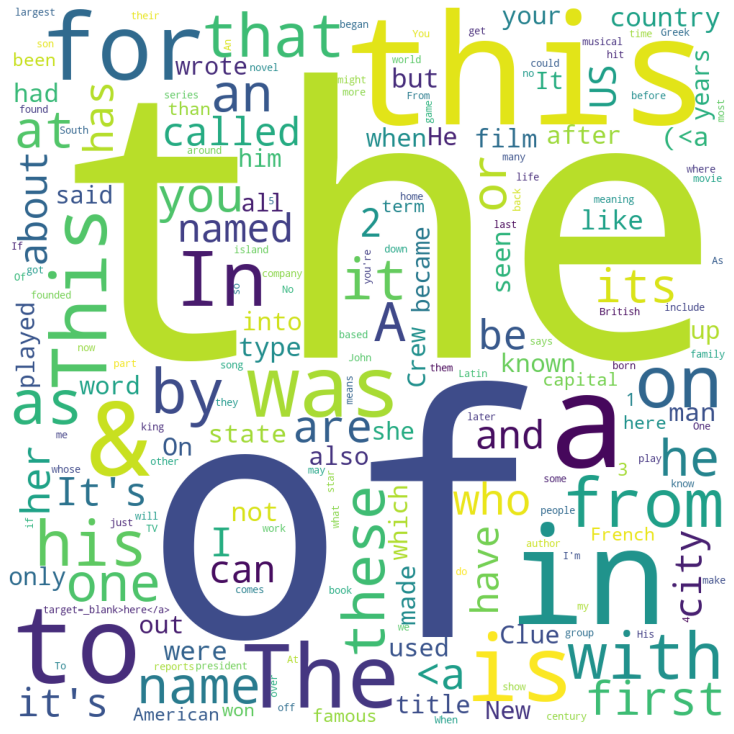

In [131]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [137]:
#removing the non key words identified from the word cloud to improve pattern recognition accuracy

words=['of','the','this','that','for','from','to','is','was','a','in','these','his','sits','on','&','with','by','as','Of','The','This','That','For','From','To','Is','Was','A','In','These','His','Sits','On','With','By','As']

for question in range(0,10000):
    quest=(questions[' Question'][question])
    for q in quest:
        if q in words:
            quest.remove(q)
    questions[' Question'][question]=quest  

questions

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,5467,2008-05-20,Double Jeopardy!,MAMMALS,$800,"[Which, wild, animal, does, razorback, refer]",hog
1,4680,2004-12-31,Jeopardy!,HISTORY,$200,"[last, 8, years, life, Galileo, under, house, ...",Copernicus
2,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"[No, 2, 1912, Olympian, football, star, at, Ca...",Jim Thorpe
3,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"[city, Yuma, state, has, record, average, 4055...",Arizona
4,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"[1963, live, Art, Linkletter, Show, company, s...",McDonald's
...,...,...,...,...,...,...,...
216926,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot
216927,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse
216928,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216929,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [139]:
#recalculating probability of word match after non key word removal

index_ref=7687
probability_threshold=0.3

sentence_match_count=0
ref_word_list=[]
ref_compare_list=[]

pattern_match_probability=[]
filtered_pattern_match=dict({})

print("\nreference question")
print(questions[' Question'][index_ref])
print("\n")

ref_word_list=questions[' Question'][index_ref]
#make the ref_word_list unique for normalization of probability
ref_word_list=list(set(ref_word_list))

for index_compare in range(0,10000):
    sentence_match_count=0
    for word in ref_word_list:
        ref_compare_list=questions[' Question'][index_compare]
        word_count=pd.Series(ref_compare_list.count(word))
        sentence_match_count=sentence_match_count+word_count.sum()
    pattern_match_probability=pattern_match_probability+[(2*sentence_match_count)/(len(ref_word_list)+len(ref_compare_list))]

q_num=0
for prob in pattern_match_probability:
    if prob>probability_threshold:
        filtered_pattern_match[q_num]=prob
        print("index "+str(q_num)+" probability of match "+str(filtered_pattern_match[q_num]))
        print(questions[' Question'][q_num])
        print("\n")
    q_num=q_num+1
    
print("Total matches after non keyword removal with probability threshold of "+str(probability_threshold)+"="+str(len(filtered_pattern_match))) 
print("False positive percentage reduction with probability threshold of "+str(probability_threshold)+"="+str((original_pattern_match-len(filtered_pattern_match))/len(filtered_pattern_match)*100))            


reference question
['Common', 'Dixie', 'razorback', 'wild', 'one']


index 0 probability of match 0.36363636363636365
['Which', 'wild', 'animal', 'does', 'razorback', 'refer']


index 7687 probability of match 1.0
['Common', 'Dixie', 'razorback', 'wild', 'one']


Total matches after non keyword removal with probability threshold of 0.3=2
False positive percentage reduction with probability threshold of 0.3=8650.0


In [140]:
#calculate word distribution count for the questions after the removal of non key words

word_dictionary=dict({})

for question in range(0,10000):
    question=(questions[' Question'][question])
    for q in question:
        if q in word_dictionary:
            word_dictionary[q]=word_dictionary[q]+1
        else:
            word_dictionary[q]=1

word_dictionary
        

{'Which': 2,
 'wild': 24,
 'animal': 51,
 'does': 15,
 'razorback': 2,
 'refer': 16,
 'last': 99,
 '8': 39,
 'years': 147,
 'life': 63,
 'Galileo': 4,
 'under': 56,
 'house': 34,
 'arrest': 4,
 'espousing': 1,
 "man's": 40,
 'theory': 13,
 'No': 93,
 '2': 264,
 '1912': 12,
 'Olympian': 1,
 'football': 18,
 'star': 71,
 'at': 485,
 'Carlisle': 2,
 'Indian': 25,
 'School': 15,
 '6': 41,
 'MLB': 1,
 'seasons': 8,
 'Reds': 4,
 'Giants': 5,
 'Braves': 1,
 'city': 234,
 'Yuma': 2,
 'state': 192,
 'has': 292,
 'record': 31,
 'average': 9,
 '4055': 1,
 'hours': 12,
 'sunshine': 1,
 'each': 38,
 'year': 57,
 '1963': 32,
 'live': 20,
 'Art': 12,
 'Linkletter': 1,
 'Show': 18,
 'company': 65,
 'served': 37,
 'its': 410,
 'billionth': 1,
 'burger': 2,
 'Signer': 1,
 'Dec': 10,
 'Indep': 1,
 'framer': 1,
 'Constitution': 6,
 'Mass': 7,
 'second': 43,
 'President': 27,
 'United': 24,
 'States': 14,
 'title': 162,
 'an': 512,
 'Aesop': 5,
 'fable': 4,
 'insect': 18,
 'shared': 13,
 'billing': 2,
 'gr

In [141]:
#plot the word cloud with only the key words retained from the questions

wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(frequencies=word_dictionary)

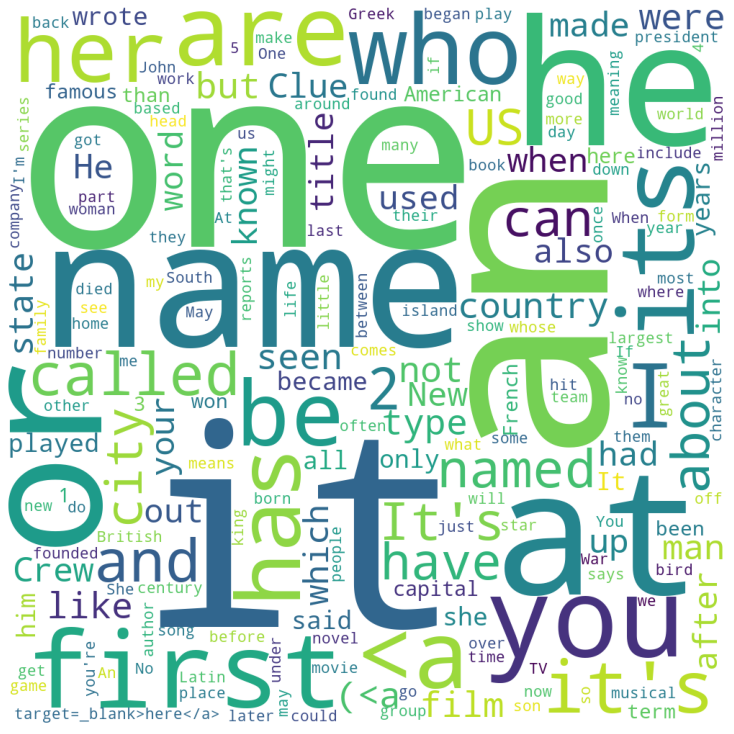

In [142]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()